# Introduction to Machine Learning

Author: Brandon Smith  

GitHub Repository:  
https://github.com/YOUR_USERNAME/datafun-07-ml

## Part 1 - Chart a Straight Line

We demonstrate a simple linear relationship using the Fahrenheit-to-Celsius conversion formula:

C = 5/9(F − 32)

This follows the slope-intercept form:

y = mx + b

Where:
- m = slope (5/9)
- b = intercept (-160/9)
- x = Fahrenheit
- y = Celsius

In [12]:
# Lambda function to convert Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)

# Create Fahrenheit values 0–100 in increments of 10
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

In [13]:
temps_df = pd.DataFrame(temps, columns=["Fahrenheit", "Celsius"])
temps_df

,Fahrenheit,Celsius
0,0,-17.777778
1,10,-12.222222
2,20,-6.666667
3,30,-1.111111
4,40,4.444444
5,50,10.000000
6,60,15.555556
7,70,21.111111
8,80,26.666667
9,90,32.222222


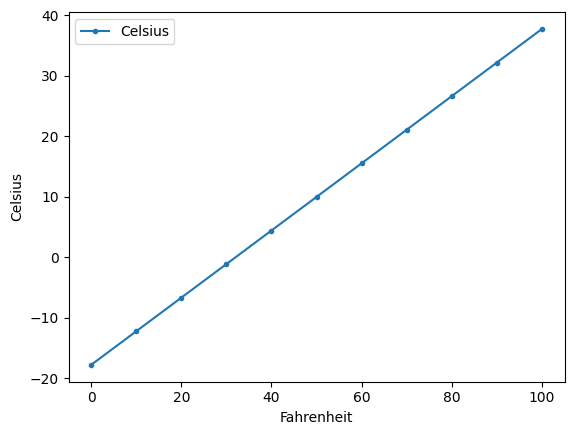

In [14]:
axes = temps_df.plot(
    x="Fahrenheit",
    y="Celsius",
    style=".-"
)

axes.set_ylabel("Celsius")
plt.show()

## PART 2 – Predict Avg High Temp in NYC in January

## Part 2 - Prediction

We now use simple linear regression to forecast NYC average January high temperatures.

### Section 1 - Data Acquisition

In [20]:
nyc_df = pd.read_csv("data/ave_hi_nyc_jan_1895-2018.csv")
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection

In [21]:
nyc_df.tail()
nyc_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


### Section 3 - Data Cleaning

In [22]:
# Rename columns for clarity
nyc_df.columns = ["Date", "Temperature", "Anomaly"]

# Remove the month (01) from Date by dividing by 100
nyc_df["Date"] = nyc_df["Date"].floordiv(100)

nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

In [23]:
pd.set_option("display.precision", 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [24]:
linear_regression = stats.linregress(
    x=nyc_df.Date,
    y=nyc_df.Temperature
)

linear_regression.slope, linear_regression.intercept

(np.float64(0.014771361132966163), np.float64(8.694993233674289))

### Section 6 - Predict

In [25]:
prediction_2024 = (
    linear_regression.slope * 2024 +
    linear_regression.intercept
)

prediction_2024

np.float64(38.5922281667978)

### Section 7 - Visualization

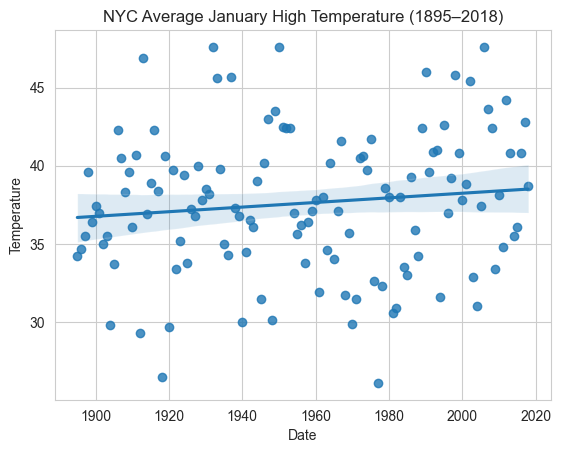

In [26]:
sns.set_style("whitegrid")

sns.regplot(
    x="Date",
    y="Temperature",
    data=nyc_df
)

plt.title("NYC Average January High Temperature (1895–2018)")
plt.show()

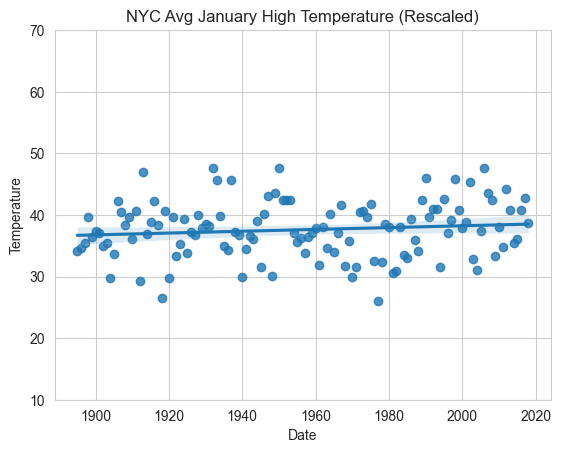

In [27]:
axes = sns.regplot(
    x="Date",
    y="Temperature",
    data=nyc_df
)

axes.set_ylim(10, 70)
plt.title("NYC Avg January High Temperature (Rescaled)")
plt.show()

## Part 3 - Prediction (Using scikit-learn)

In this section, we use the scikit-learn `LinearRegression` estimator to rebuild the simple linear regression model using training and testing datasets.

This approach differs from Part 2 because we:
- Split the data into training and testing sets
- Train a supervised learning model
- Evaluate predictions
- Visualize the regression line manually

In [28]:
### Section 1 - Build the Model